In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
#훈련을 위해서 sklearn이라는 함수에서 train_test_split을 씁니다.(데이터 분할)
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
# 농어의 길이가 50cm일때 농어의 무게는?
knn.predict([[50]])

array([1033.33333333])

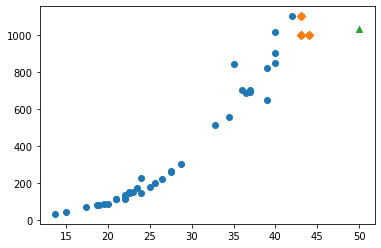

In [11]:
# 실제로 1033인지 검증 필요
import matplotlib.pyplot as plt

distance, indexes = knn.kneighbors([[50]])
plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker = 'D')

# 50cm 농어의 데이터
plt.scatter(50, 1033, marker = '^');

### Linear Regression Model(선형회귀모형)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.predict([[50]]))
print(lr.coef_) # 기울기
print(lr.intercept_) # y절편

[1241.83860323]
[39.01714496]
-709.0186449535477


In [20]:
list(lr.predict([[50]]))[0]

1241.8386032279625

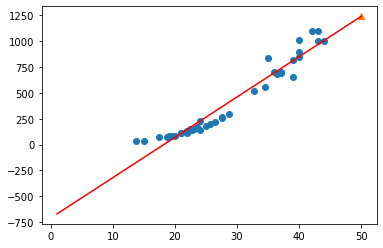

In [26]:
plt.scatter(X_train, y_train)
plt.plot([1, 50], [1*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_], 'r')
plt.scatter(50, list(lr.predict([[50]]))[0], marker='^')